In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
plt.style.use('ggplot')
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 12

COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR

In [2]:
df = pd.read_pickle("dataframes/df_n_experts.pd")
df["gate"] = df["gate"].astype(str)
df

,dataset,n_features,train,test,train_std,test_std,n_experts,depth,gate
0,generated6,2,0.641600,0.636800,0.003960,0.006524,1,1,feature_importance_lr_max
1,generated6,2,0.740400,0.736800,0.004472,0.011634,1,2,feature_importance_lr_max
2,generated6,2,0.742000,0.737600,0.004189,0.005906,2,1,feature_importance_lr_max
3,generated6,2,0.815733,0.809200,0.002903,0.006000,2,2,feature_importance_lr_max
4,generated6,2,0.779467,0.764200,0.020226,0.024957,3,1,feature_importance_lr_max
...,...,...,...,...,...,...,...,...,...
115,iris,4,1.000000,0.933321,0.000000,0.013366,8,2,None
116,iris,4,1.000000,0.959993,0.000000,0.029507,9,1,None
117,iris,4,0.995555,0.913585,0.004445,0.021132,9,2,None
118,iris,4,0.997788,0.953414,0.003832,0.021774,10,1,None


In [3]:
colormap = { 
    'iris_input.pd': "#8EBA42",
    'breast_cancer_input.np' : "#FBC15E" ,
    'cars_input.pd' : "#B97357",
    'abalone_input.pd': "#348ABD",
    'steel_input.pd': "#988ED5",
    'contraceptive_input.pd' : "#E24A33" ,
    'students_input.pd' : "#81D0DB",
    
    'occupancy_input.pd' : "#348ABD",
    'banknote_input.pd' : "#81D0DB",
    'pdm6_input.pd' : "#FBC15E",
    'bank_input.pd' : "#8EBA42",
    'adult_input.pd' :"#E24A33",
    'hrss_input.pd' : "#988ED5",
    
    'generated6_input.np' : "grey",
}
datasets1 = [
             'generated6_input.np',
             'iris_input.pd',
             'breast_cancer_input.np',
             'cars_input.pd',
             'abalone_input.pd',
             'steel_input.pd',
             'students_input.pd',
]
datasets2 = [
             'contraceptive_input.pd',
             'occupancy_input.pd',
             'banknote_input.pd',
             'pdm6_input.pd',
             'bank_input.pd',
             'adult_input.pd',
             'hrss_input.pd',
]

In [4]:
 df[(df.dataset ==  "iris") & (df.gate == "None") & (df.depth == 2)]

,dataset,n_features,train,test,train_std,test_std,n_experts,depth,gate
101,iris,4,0.964424,0.939900,0.006398,0.022211,1,2,None
103,iris,4,0.991091,0.959637,0.006314,0.030298,2,2,None
105,iris,4,0.995555,0.907183,0.004445,0.042998,3,2,None
107,iris,4,0.995555,0.919452,0.004445,0.050571,4,2,None
109,iris,4,0.997768,0.953414,0.003866,0.011307,5,2,None
111,iris,4,0.997788,0.959815,0.003832,0.030064,6,2,None
113,iris,4,1.000000,0.932788,0.000000,0.048826,7,2,None
115,iris,4,1.000000,0.933321,0.000000,0.013366,8,2,None
117,iris,4,0.995555,0.913585,0.004445,0.021132,9,2,None
119,iris,4,1.000000,0.933499,0.000000,0.054780,10,2,None


No handles with labels found to put in legend.


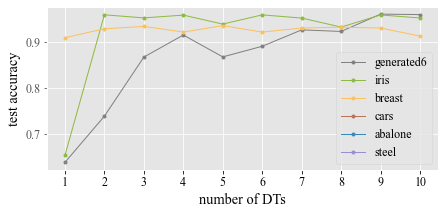

No handles with labels found to put in legend.


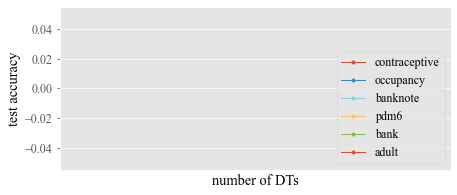

No handles with labels found to put in legend.


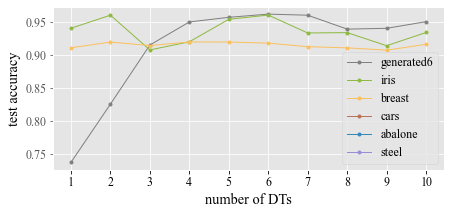

No handles with labels found to put in legend.


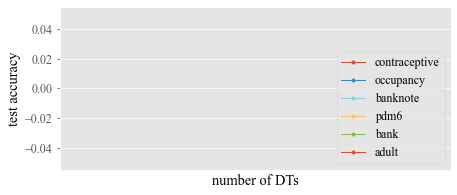

No handles with labels found to put in legend.


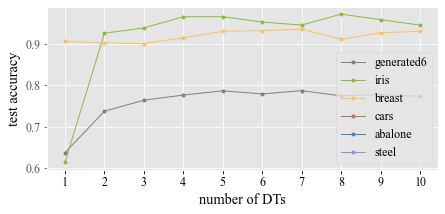

No handles with labels found to put in legend.


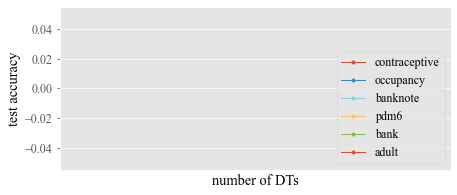

No handles with labels found to put in legend.


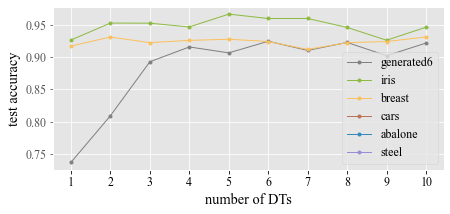

No handles with labels found to put in legend.


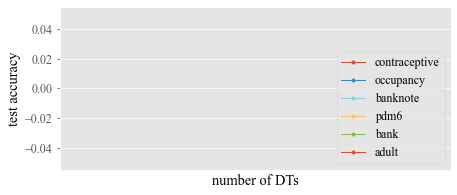

In [6]:
for gate in ["None","feature_importance_lr_max"]:
    for depth in [1,2]:
        first_set = True
        for datasets_chunk in [datasets1,datasets2]:
            if first_set:
                first_set = False
                chunk_name = "datasets1"
            else:
                chunk_name = "datasets2"
            for dataset in datasets_chunk:
                dataset_name = dataset.split("_")[0]

                slice1 = df[(df.dataset ==  dataset_name) & (df.gate == gate) & (df.depth == depth)]
                fig = plt.gcf()
                fig.set_size_inches(6.8, 2.9)
                plt.xticks(df.n_experts.unique())
                plt.ylabel("test accuracy")
                plt.xlabel("number of DTs")
                #plt.title(str(gate) + " " + str(depth))
                ax = plt.gca()
                ax.legend(loc="lower right")    
                plt.plot(slice1.n_experts,slice1.test,linewidth=1,linestyle='-',marker=".",color=colormap[dataset],label=dataset_name)
            plt.savefig("plots/n_experts_{}_{}_{}.pdf".format(gate,str(depth),chunk_name), bbox_inches="tight")
            plt.show()
